___
### IMPORTS

In [44]:
# Modules used for data handling / test
import pickle

# Modules used for EDA
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns


# Modules used for ML
from sklearn import preprocessing
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

In [45]:
# Modules settings
%matplotlib inline

In [46]:
### TODO ### Import a class from a module

# For a better pd.DataFrame visualization
class display(object):
    '''This class was found in 'Python Data Science Handbook' by jakevdp (Jake Vanderplas),
    which you can access though his GitHub repository
    (https://github.com/jakevdp/PythonDataScienceHandbook)'''
    
    template = '''<div style="float: left; padding: 10px;">
                  <p style='font-family:"Courier New", Courier, monospace'>{0}</p>{1}
                  </div>'''
    
    def __init__(self, *args):
        self.args = args
        
    def _repr_html_(self):
        return '\n'.join(self.template.format(a, eval(a)._repr_html_()) for a in self.args)
    
    def __repr__(self):
        return '\n\n'.join(a + '\n' + repr(eval(a)) for a in self.args)

___
### GETTING DATASET

I'll be working with big_museum.

In [47]:
with open('./data/big_museum/big_museum_clean.csv', 'rb') as file:
    museum = pickle.load(file)

In [48]:
museum[museum['artist'] == 'sorolla']

,img_ID,artist,height,width,whitespace,chiaroscuro,color_01,color_02,color_03,color_04,color_05,color_06,color_07,color_08,color_09,color_10
4145,251124,sorolla,250,175,0.39771,0.04839,#003F00,#FFBF3F,#BF0000,#FFFF7F,#3F0000,#3F0000,#FF7F00,#7F7F00,#7F003F,#7F3F3F
4146,251108,sorolla,250,452,0.39912,0.53059,#BF7F7F,#7F3F3F,#FFFFBF,#000000,#FF7FBF,#BFBF3F,#3F3F00,#FFBF3F,#BF3F7F,#BF3F00
4147,9223372032559865553,sorolla,250,372,0.39892,0.05625,#FFBF7F,#000000,#7F7F3F,#FFFFFF,#7FBFBF,#3F3F3F,#BFFFFF,#3F003F,#7F3F7F,#7F3F00
4148,251106,sorolla,250,203,0.39803,0.00864,#3F0000,#BFBF7F,#BF7F00,#FFFFFF,#7F3F00,#000000,#FFFFBF,#3F0000,#FFBF3F,#3F3F3F
4149,251163,sorolla,250,382,0.40000,0.16544,#3F003F,#FFFFFF,#BF7F00,#000000,#7F7F7F,#BFBF3F,#7F3F3F,#3F7F3F,#3F0000,#BFBFBF
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4499,251425,sorolla,250,345,0.39884,1.27881,#7F3F3F,#FFBF7F,#FFFFFF,#BFBF3F,#BFBFFF,#000000,#7F7F3F,#7F7FBF,#3F0000,#FFBFFF
4500,251426,sorolla,250,157,0.39745,0.07804,#FFBF7F,#003F00,#7F7F3F,#FFBF00,#BF7F7F,#7F3F00,#FFFFFF,#FF7F3F,#000000,#7F0000
4501,251427,sorolla,250,378,0.39894,0.02073,#FFBF3F,#3F0000,#7F7F3F,#000000,#FF3F3F,#003F3F,#3F7F3F,#FF7F00,#7F0000,#BFBF7F
4502,251428,sorolla,250,366,0.39891,0.02297,#3F3F00,#7F7F7F,#3F7F00,#BF7F00,#3F0000,#003F3F,#3F3F3F,#FFBF7F,#7F003F,#7F003F


___
### BASIC EDA

The height column doesn't give any information, but the ratio data may work. Let's clean up!

In [49]:
museum['ratio'] = museum['height'] / museum['width']

museum.drop(labels='height', axis=1, inplace=True)

In [50]:
museum.head()

,img_ID,artist,width,whitespace,chiaroscuro,color_01,color_02,color_03,color_04,color_05,color_06,color_07,color_08,color_09,color_10,ratio
0,9223372032559824886,caravaggio,211,0.39810,0.00659,#3F0000,#FFFF7F,#3F003F,#BF3F3F,#FFBF7F,#7F0000,#BF7F3F,#3F0000,#FFFFBF,#BFBFBF,1.184834
1,186636,caravaggio,239,0.39833,0.01178,#003F00,#BF7F7F,#3F0000,#FFBF7F,#7F0000,#3F7F3F,#3F003F,#FFFFFF,#BF7F00,#3F3F00,1.046025
2,186724,caravaggio,169,0.39763,0.01400,#3F0000,#BFBFBF,#7F3F7F,#003F3F,#003F00,#3F3F3F,#FFFFFF,#7F3F3F,#BF7F7F,#FFFF7F,1.479290
3,186639,caravaggio,347,0.39885,0.02416,#3F3F00,#BF7F00,#7F7F3F,#FFBF7F,#7F003F,#3F003F,#3F3F3F,#7F3F00,#3F3F3F,#BF7F3F,0.720461
4,186671,caravaggio,328,0.39878,0.01706,#7F003F,#BF7F7F,#00003F,#7F0000,#3F0000,#FFBFBF,#3F0000,#003F00,#7F7F3F,#FF7F3F,0.762195


___
### FEATURE ENGINEERING

Another valious information is the *'school'* or style of the artist. Some artists practiced several styles but I'll just use the most significant and reduce it to two groups: classics and vanguards.

| Artist                 | Movement                    | Group
| :---                   | :---                        | :---
| Caravaggio             | Baroque                     | Classic
| Edgar Degas            | Impressionism               | Classic
| Francisco de Goya      | Romanticism                 | Classic
| Katsushika Hokusai     | Ukiyo-e                     | Classic
| Frida Kahlo            | Surrealism                  | Vanguards
| Wassily Kandinsky      | Expressionism               | Classic
| Gustav Klimt           | Art Nouveau                 | Vanguards
| Roy Lichtenstein       | Pop Art                     | Vanguards
| Piet Mondrian          | De Stijl                    | Vanguards
| Claude Monet           | Impressionism               | Classic
| Pablo Picasso          | Cubism                      | Vanguards
| Jackson Pollock        | Abstract Expressionism      | Vanguards
| Joaquín Sorolla        | Impressionism               | Classic
| Diego Velazquez        | Baroque                     | Classic
| Andy Warhol            | Pop Art                     | Vanguards

In [51]:
vanguards = ['kahlo', 'klimt', 'lichtenstein', 'mondrian',
             'picasso', 'pollock', 'warhol']

museum['group'] = 0
museum.loc[museum['artist'].isin(vanguards), 'group'] = 1

In [52]:
museum.head()

,img_ID,artist,width,whitespace,chiaroscuro,color_01,color_02,color_03,color_04,color_05,color_06,color_07,color_08,color_09,color_10,ratio,group
0,9223372032559824886,caravaggio,211,0.39810,0.00659,#3F0000,#FFFF7F,#3F003F,#BF3F3F,#FFBF7F,#7F0000,#BF7F3F,#3F0000,#FFFFBF,#BFBFBF,1.184834,0
1,186636,caravaggio,239,0.39833,0.01178,#003F00,#BF7F7F,#3F0000,#FFBF7F,#7F0000,#3F7F3F,#3F003F,#FFFFFF,#BF7F00,#3F3F00,1.046025,0
2,186724,caravaggio,169,0.39763,0.01400,#3F0000,#BFBFBF,#7F3F7F,#003F3F,#003F00,#3F3F3F,#FFFFFF,#7F3F3F,#BF7F7F,#FFFF7F,1.479290,0
3,186639,caravaggio,347,0.39885,0.02416,#3F3F00,#BF7F00,#7F7F3F,#FFBF7F,#7F003F,#3F003F,#3F3F3F,#7F3F00,#3F3F3F,#BF7F3F,0.720461,0
4,186671,caravaggio,328,0.39878,0.01706,#7F003F,#BF7F7F,#00003F,#7F0000,#3F0000,#FFBFBF,#3F0000,#003F00,#7F7F3F,#FF7F3F,0.762195,0


___

The color columns are coded in HEX notation and are object types elements. I'll use a hash encoder to transform them.

In [53]:
museum.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4271 entries, 0 to 4637
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   img_ID       4271 non-null   object 
 1   artist       4271 non-null   object 
 2   width        4271 non-null   int64  
 3   whitespace   4271 non-null   float64
 4   chiaroscuro  4271 non-null   float64
 5   color_01     4271 non-null   object 
 6   color_02     4271 non-null   object 
 7   color_03     4271 non-null   object 
 8   color_04     4271 non-null   object 
 9   color_05     4271 non-null   object 
 10  color_06     4271 non-null   object 
 11  color_07     4271 non-null   object 
 12  color_08     4271 non-null   object 
 13  color_09     4271 non-null   object 
 14  color_10     4271 non-null   object 
 15  ratio        4271 non-null   float64
 16  group        4271 non-null   int64  
dtypes: float64(3), int64(2), object(12)
memory usage: 600.6+ KB


In [54]:
# Find unique colors in the ten colors columns
unique_colors = []

for i in range(5,15):
    for j in museum.iloc[:, i].unique():
        if j in unique_colors: continue
        else: unique_colors.append(j)

# Count colors found
print(len(unique_colors))

103


In [55]:
# Turn unique_colors in a 1D np.array
unique_colors = np.array(unique_colors).astype('object')

unique_colors

array(['#3F0000', '#003F00', '#3F3F00', '#7F003F', '#003F3F', '#FFBF7F',
       '#3F3F3F', '#BF7F7F', '#00003F', '#000000', '#3F003F', '#7F0000',
       '#7F3F00', '#FFBFBF', '#BFBF7F', '#7F7F7F', '#FF7F7F', '#FFFFFF',
       '#7F3F3F', '#7F7F3F', '#BFBF00', '#7FBFBF', '#BF7FBF', '#FFFF7F',
       '#BF0000', '#FFBFFF', '#FFBF3F', '#7F7F00', '#3F7F3F', '#FFBF00',
       '#FFFF3F', '#007F3F', '#FFFFBF', '#BFBFBF', '#BF3F00', '#7F3F7F',
       '#BF7F3F', '#FF7F3F', '#3F7F7F', '#BFFF7F', '#BF3F3F', '#BFBF3F',
       '#3F7F00', '#7FBF3F', '#3F3F7F', '#7FBF00', '#7FBF7F', '#3FBF7F',
       '#BF3F7F', '#7F7FBF', '#BF7F00', '#FF3F3F', '#BFFFBF', '#BFFFFF',
       '#7FBFFF', '#FF7F00', '#FF3F7F', '#BFBFFF', '#FF3F00', '#3F007F',
       '#FF0000', '#003F7F', '#7FFFBF', '#3FBFBF', '#7FFF7F', '#7F3FBF',
       '#7FFFFF', '#00007F', '#003FBF', '#FFFF00', '#00BF7F', '#3F7FBF',
       '#BF003F', '#0000BF', '#FF7FBF', '#3F3FBF', '#007F7F', '#00BFBF',
       '#007FBF', '#007F00', '#7F7FFF', '#3FBFFF', 

In [56]:
# Instance, fit & transform label encoder
label_encoder = preprocessing.LabelEncoder()
label_encoder.fit(unique_colors)
label_encoder.transform(label_encoder.classes_)

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102])

In [57]:
# Transform features (hash encoder)
col_names = ['color_01', 'color_02', 'color_03', 'color_04', 'color_05',
             'color_06', 'color_07', 'color_08', 'color_09', 'color_10']

encoded_col_names = ['c01', 'c02', 'c03', 'c04', 'c05',
                     'c06', 'c07', 'c08', 'c09', 'c10']

for col_name, encoded_col_name in zip(col_names, encoded_col_names):
    museum[encoded_col_name] = label_encoder.transform(museum[col_name])

# Drop colums with HEX values
museum.drop(labels=col_names, axis=1, inplace=True)

# Transform features (standar scaler)
col_names = ['c01', 'c02', 'c03', 'c04', 'c05',
             'c06', 'c07', 'c08', 'c09', 'c10',]

encoded_col_names = ['c01_std', 'c02_std', 'c03_std', 'c04_std', 'c05_std',
                     'c06_std', 'c07_std', 'c08_std', 'c09_std', 'c10_std']

museum[encoded_col_names] = preprocessing.StandardScaler().fit_transform(museum[col_names])

# Drop original colums
museum.drop(labels=col_names, axis=1, inplace=True)

# Show result
museum

,img_ID,artist,width,whitespace,chiaroscuro,ratio,group,c01_std,c02_std,c03_std,c04_std,c05_std,c06_std,c07_std,c08_std,c09_std,c10_std
0,9223372032559824886,caravaggio,211,0.39810,0.00659,1.184834,0,-0.921670,1.388599,-0.935703,0.360891,1.238188,-0.353776,0.485056,-1.067667,1.437950,0.710729
1,186636,caravaggio,239,0.39833,0.01178,1.046025,0,-1.289976,0.538059,-0.964458,1.221173,-0.387606,-0.675702,-0.999377,1.474699,0.426092,-0.978037
2,186724,caravaggio,169,0.39763,0.01400,1.479290,0,-0.921670,0.708167,-0.188086,-1.330996,-1.374694,-0.822032,1.464781,-0.280744,0.487417,1.461292
3,186639,caravaggio,347,0.39885,0.02416,0.720461,0,-0.808345,0.481356,-0.073068,1.221173,-0.358574,-0.939097,-0.880622,-0.311011,-0.953713,0.491815
4,186671,caravaggio,328,0.39878,0.01706,0.762195,0,-0.298383,0.538059,-1.453285,-0.384686,-0.997278,1.314388,-1.029065,-1.461129,-0.156492,1.117284
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4633,229217,velazquez,362,0.39890,0.03147,0.690608,0,-1.431632,-0.028969,-1.453285,0.504272,-1.345662,-0.324510,-0.138406,-0.946602,1.437950,-0.446388
4634,229182,velazquez,192,0.39792,191.00000,1.302083,0,-0.071734,-1.446537,0.617041,0.934413,0.280131,-0.353776,1.197584,0.929906,-0.340466,1.086011
4635,229183,velazquez,204,0.39804,0.00714,1.225490,0,0.693210,-0.936212,-1.309512,-0.126602,-1.519855,1.314388,-0.880622,-0.734738,0.334105,-0.446388
4636,9223372032559882013,velazquez,138,0.39710,0.01824,1.811594,0,0.551553,-0.936212,-0.245595,-1.359672,0.338195,-0.031849,-0.880622,1.444433,-0.831064,-1.509685


___

Now it's time to apply a standar scaler to `width`, `whitespace`, `chiaroscuro`, `ratio`

In [58]:
col_names = ['width', 'whitespace', 'chiaroscuro', 'ratio']
encoded_col_names = ['width_std', 'whitespace_std', 'chiaroscuro_std', 'ratio_std']

# Transform features
museum[encoded_col_names] = preprocessing.StandardScaler().fit_transform(museum[col_names])

# Drop original colums
museum.drop(labels=col_names, axis=1, inplace=True)

# Show result
museum

,img_ID,artist,group,c01_std,c02_std,c03_std,c04_std,c05_std,c06_std,c07_std,c08_std,c09_std,c10_std,width_std,whitespace_std,chiaroscuro_std,ratio_std
0,9223372032559824886,caravaggio,0,-0.921670,1.388599,-0.935703,0.360891,1.238188,-0.353776,0.485056,-1.067667,1.437950,0.710729,-0.595676,-0.555053,-0.121122,0.366144
1,186636,caravaggio,0,-1.289976,0.538059,-0.964458,1.221173,-0.387606,-0.675702,-0.999377,1.474699,0.426092,-0.978037,-0.312410,-0.271210,-0.120839,-0.002834
2,186724,caravaggio,0,-0.921670,0.708167,-0.188086,-1.330996,-1.374694,-0.822032,1.464781,-0.280744,0.487417,1.461292,-1.020574,-1.135080,-0.120717,1.148857
3,186639,caravaggio,0,-0.808345,0.481356,-0.073068,1.221173,-0.358574,-0.939097,-0.880622,-0.311011,-0.953713,0.491815,0.780186,0.370522,-0.120163,-0.868238
4,186671,caravaggio,0,-0.298383,0.538059,-1.453285,-0.384686,-0.997278,1.314388,-1.029065,-1.461129,-0.156492,1.117284,0.587970,0.284135,-0.120551,-0.757302
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4633,229217,velazquez,0,-1.431632,-0.028969,-1.453285,0.504272,-1.345662,-0.324510,-0.138406,-0.946602,1.437950,-0.446388,0.931936,0.432227,-0.119765,-0.947593
4634,229182,velazquez,0,-0.071734,-1.446537,0.617041,0.934413,0.280131,-0.353776,1.197584,0.929906,-0.340466,1.086011,-0.787892,-0.777191,10.295127,0.677812
4635,229183,velazquez,0,0.693210,-0.936212,-1.309512,-0.126602,-1.519855,1.314388,-0.880622,-0.734738,0.334105,-0.446388,-0.666492,-0.629099,-0.121092,0.474214
4636,9223372032559882013,velazquez,0,0.551553,-0.936212,-0.245595,-1.359672,0.338195,-0.031849,-0.880622,1.444433,-0.831064,-1.509685,-1.334190,-1.789152,-0.120486,2.032178


___
### BALANCE DATASET

I'll feed the models with the data as they are, and with balanced datasets.  
I will try two targets (artists and groups), and will use over/undersampling, so I'll be handling various versions of this museum.

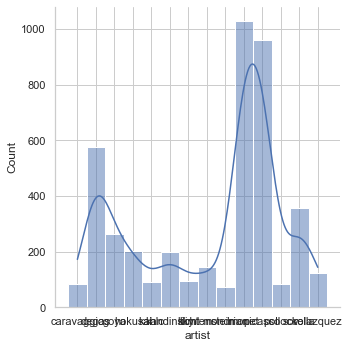

In [ ]:
sns.displot(museum['artist'], kde=True)

# I will try a decision tree

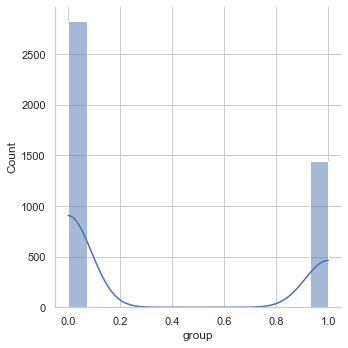

In [ ]:
sns.displot(museum['group'], kde=True)

# I will try a logistic regresion

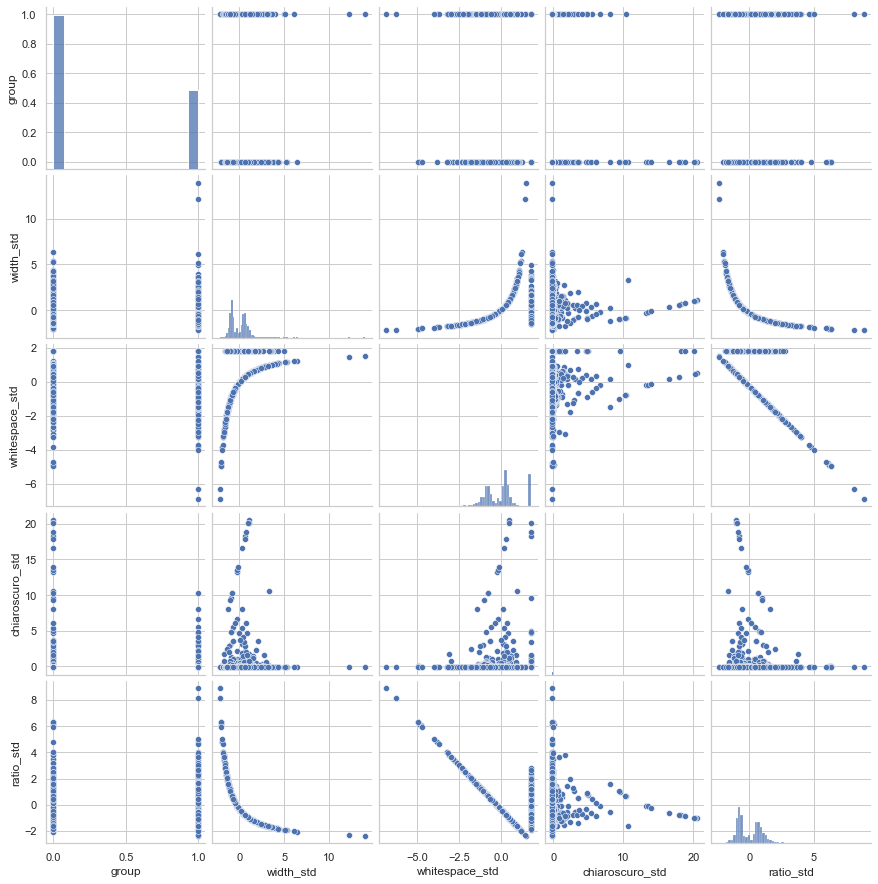

In [ ]:
sns.pairplot(museum.loc[:, ['artist', 'group', 'width_std', 'whitespace_std', 'chiaroscuro_std', 'ratio_std']])
plt.show()

<AxesSubplot:>

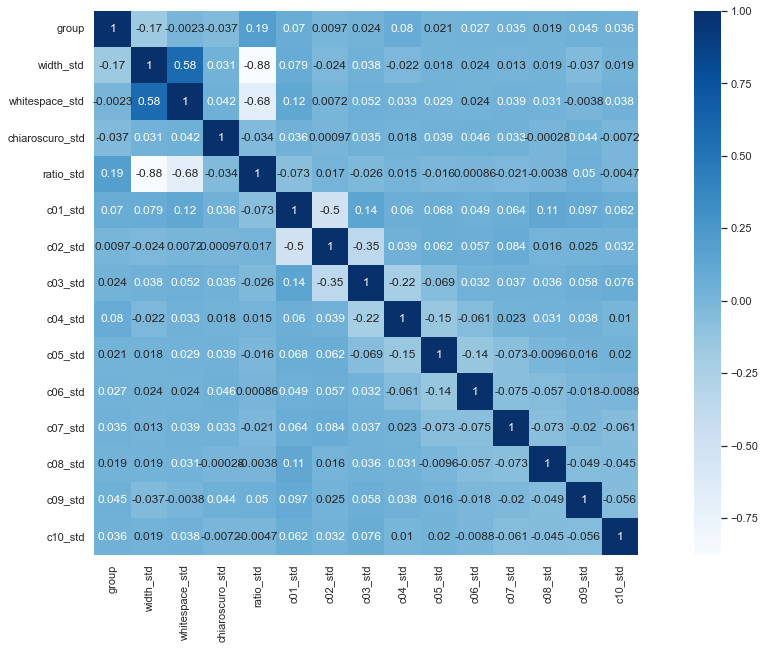

In [ ]:
sns.heatmap(museum.corr(), square=True, annot=True, cmap='Blues')

<Figure size 1440x3600 with 0 Axes>

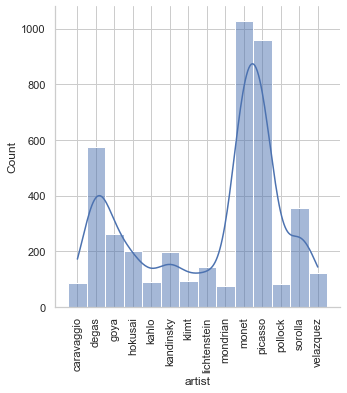

In [ ]:
plt.figure(figsize=(20,50))
ax = sns.displot(museum['artist'], kde=True)
plt.xticks(rotation=90);

In [59]:
museum.groupby('group').count().iloc[:, 0]

group
0    2827
1    1444
Name: img_ID, dtype: int64

In [90]:
ideal_samples_group = museum.groupby('group').count().iloc[:, 0].sum() // museum['group'].nunique()

print(f'The ideal size of each category (target = "group") is {ideal_samples_group}')

The ideal size of each category (target = "group") is 2135


In [61]:
museum.groupby('artist').count().iloc[:, 0]

artist
caravaggio        85
degas            575
goya             262
hokusai          201
kahlo             91
kandinsky        199
klimt             94
lichtenstein     143
mondrian          74
monet           1028
picasso          960
pollock           82
sorolla          355
velazquez        122
Name: img_ID, dtype: int64

In [91]:
ideal_samples_artist = museum.groupby('artist').count().iloc[:, 0].sum() // museum['artist'].nunique()

print(f'The ideal size of each category (target = "artists") is {ideal_samples_artist}')

The ideal size of each category (target = "artists") is 305


In [92]:
museum.head()

,img_ID,artist,group,c01_std,c02_std,c03_std,c04_std,c05_std,c06_std,c07_std,c08_std,c09_std,c10_std,width_std,whitespace_std,chiaroscuro_std,ratio_std
0,9223372032559824886,caravaggio,0,-0.921670,1.388599,-0.935703,0.360891,1.238188,-0.353776,0.485056,-1.067667,1.437950,0.710729,-0.595676,-0.555053,-0.121122,0.366144
1,186636,caravaggio,0,-1.289976,0.538059,-0.964458,1.221173,-0.387606,-0.675702,-0.999377,1.474699,0.426092,-0.978037,-0.312410,-0.271210,-0.120839,-0.002834
2,186724,caravaggio,0,-0.921670,0.708167,-0.188086,-1.330996,-1.374694,-0.822032,1.464781,-0.280744,0.487417,1.461292,-1.020574,-1.135080,-0.120717,1.148857
3,186639,caravaggio,0,-0.808345,0.481356,-0.073068,1.221173,-0.358574,-0.939097,-0.880622,-0.311011,-0.953713,0.491815,0.780186,0.370522,-0.120163,-0.868238
4,186671,caravaggio,0,-0.298383,0.538059,-1.453285,-0.384686,-0.997278,1.314388,-1.029065,-1.461129,-0.156492,1.117284,0.587970,0.284135,-0.120551,-0.757302


In [77]:
# Train/test split (unbalanced)
X = museum.iloc[:, 3:]
y_artist = museum.iloc[:, 1]
y_group = museum.iloc[:, 2]

In [78]:
# Balance by undersample
undersample = RandomUnderSampler(random_state=42)

X_artist_under, y_artist_under = undersample.fit_resample(X, y_artist)
X_group_under, y_group_under = undersample.fit_resample(X, y_group)

In [79]:
# Balance by oversample
oversample = SMOTE(random_state=42)

X_artist_over, y_artist_over = oversample.fit_resample(X, y_artist)
X_group_over, y_group_over = oversample.fit_resample(X, y_group)

___
### EXPORT RESULTS

In [80]:
museum.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4271 entries, 0 to 4637
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   img_ID           4271 non-null   object 
 1   artist           4271 non-null   object 
 2   group            4271 non-null   int64  
 3   c01_std          4271 non-null   float64
 4   c02_std          4271 non-null   float64
 5   c03_std          4271 non-null   float64
 6   c04_std          4271 non-null   float64
 7   c05_std          4271 non-null   float64
 8   c06_std          4271 non-null   float64
 9   c07_std          4271 non-null   float64
 10  c08_std          4271 non-null   float64
 11  c09_std          4271 non-null   float64
 12  c10_std          4271 non-null   float64
 13  width_std        4271 non-null   float64
 14  whitespace_std   4271 non-null   float64
 15  chiaroscuro_std  4271 non-null   float64
 16  ratio_std        4271 non-null   float64
dtypes: float64(14)

In [81]:
display('X_group_over', 'X_artist_over')

,c01_std,c02_std,c03_std,c04_std,c05_std,c06_std,c07_std,c08_std,c09_std,c10_std,width_std,whitespace_std,chiaroscuro_std,ratio_std
0,-0.921670,1.388599,-0.935703,0.360891,1.238188,-0.353776,0.485056,-1.067667,1.437950,0.710729,-0.595676,-0.555053,-0.121122,0.366144
1,-1.289976,0.538059,-0.964458,1.221173,-0.387606,-0.675702,-0.999377,1.474699,0.426092,-0.978037,-0.312410,-0.271210,-0.120839,-0.002834
2,-0.921670,0.708167,-0.188086,-1.330996,-1.374694,-0.822032,1.464781,-0.280744,0.487417,1.461292,-1.020574,-1.135080,-0.120717,1.148857
3,-0.808345,0.481356,-0.073068,1.221173,-0.358574,-0.939097,-0.880622,-0.311011,-0.953713,0.491815,0.780186,0.370522,-0.120163,-0.868238
4,-0.298383,0.538059,-1.453285,-0.384686,-0.997278,1.314388,-1.029065,-1.461129,-0.156492,1.117284,0.587970,0.284135,-0.120551,-0.757302
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5649,-1.162009,1.203501,-0.822336,1.408391,-1.437760,-0.983836,0.724976,0.121048,0.346128,0.202799,0.616337,0.294203,-0.120515,-0.770865
5650,1.415022,-0.822807,1.307064,0.967283,-1.519855,-1.394511,1.092389,0.728794,1.467971,-0.103687,-0.212965,-0.196685,-0.119984,-0.109144
5651,-0.849806,0.150131,1.440401,0.945605,-0.733867,0.825433,-0.706833,-1.518708,0.504619,-1.116854,-1.085962,-1.248557,-0.108894,1.305803
5652,-1.208847,1.352228,-1.249675,1.217843,0.097139,-0.626479,-0.105870,-1.033273,-1.053443,1.460976,2.792733,0.885852,-0.119467,-1.565153


In [82]:
display('X_group_under', 'X_artist_under')

,c01_std,c02_std,c03_std,c04_std,c05_std,c06_std,c07_std,c08_std,c09_std,c10_std,width_std,whitespace_std,chiaroscuro_std,ratio_std
0,1.429822,-0.936212,0.530777,0.102807,1.093027,-1.465885,-0.257160,-1.037401,-0.769739,1.367472,0.436221,0.210089,-0.119057,-0.660207
1,-0.213390,-0.936212,1.278394,-0.700123,-0.097285,0.377875,-1.415018,1.474699,-1.107025,1.273652,0.871236,0.407545,-0.121062,-0.916654
2,-1.403301,1.105086,-0.849440,1.421906,0.367227,-0.851298,-1.533772,-0.734738,0.027482,1.336198,-1.010458,1.789736,-0.116429,1.125726
3,-0.780014,-0.936212,1.249640,-0.384686,-0.039221,0.494939,-1.415018,-0.129413,-1.474973,1.492566,2.591064,0.851820,-0.118709,-1.519957
4,-0.015071,0.169491,-1.309512,-0.642771,1.296252,1.285122,0.099104,-0.159679,0.855365,-0.946763,0.699253,0.333499,0.117916,-0.823044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2883,-0.213390,1.445302,-1.453285,0.647652,-1.374694,-1.348821,-0.108717,1.444433,-1.107025,1.523839,0.658787,0.321158,-0.119241,-0.799637
2884,1.458153,-0.057320,-1.482039,0.819708,0.338195,1.050994,1.435093,-0.946602,1.223313,0.053987,-0.990224,1.789736,-0.119914,1.080272
2885,1.458153,-1.304780,1.422167,0.819708,-1.490823,0.114481,1.435093,-0.129413,1.253976,0.835823,-1.040807,-1.172103,-0.117799,1.195949
2886,-0.610027,-1.276429,1.450921,0.532948,0.686579,-1.495151,1.227272,1.444433,0.456755,-0.321294,1.245551,0.530955,-0.120308,-1.092398


In [87]:
y_artist_over

0        caravaggio
1        caravaggio
2        caravaggio
3        caravaggio
4        caravaggio
            ...    
14387     velazquez
14388     velazquez
14389     velazquez
14390     velazquez
14391     velazquez
Name: artist, Length: 14392, dtype: object

In [88]:
y_group_over

0       0
1       0
2       0
3       0
4       0
       ..
5649    1
5650    1
5651    1
5652    1
5653    1
Name: group, Length: 5654, dtype: int64

In [ ]:
y_artist_under

0       caravaggio
1       caravaggio
2       caravaggio
3       caravaggio
4       caravaggio
           ...    
1031     velazquez
1032     velazquez
1033     velazquez
1034     velazquez
1035     velazquez
Name: artist, Length: 1036, dtype: object

In [ ]:
y_group_under

0       0
1       0
2       0
3       0
4       0
       ..
2883    1
2884    1
2885    1
2886    1
2887    1
Name: group, Length: 2888, dtype: int64

In [155]:
with open('./data/clean_data', 'wb') as file:
    pickle.dump(museum, file)
    pickle.dump(X, file)
    pickle.dump(y_artist, file)
    pickle.dump(y_group, file)
    pickle.dump(X_artist_over, file)
    pickle.dump(y_artist_over, file)
    pickle.dump(X_group_over, file)
    pickle.dump(y_group_over, file)
    pickle.dump(X_artist_under, file)
    pickle.dump(y_artist_under, file)
    pickle.dump(X_group_under, file)
    pickle.dump(y_group_under, file)